In [1]:
import sys
import os
sys.path.insert(0,'/content/NextFace') #verify ur path

In [2]:
from optimizer import Optimizer
from config import Config
config = Config()
config.fillFromDicFile('./optimConfig.ini')
# config.device = 'cuda' # torch not compiled with cuda
config.path = './baselMorphableModel/' #verify ur path


loading optim config from:  ./optimConfig.ini


In [3]:
import torch

imagePath = './input/detailled_faces_unsplash/Bikerman.jpg' #verify ur path
outputDir = './output/' + os.path.basename(imagePath.strip('/'))
# VALIDATE CUDA
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))
# # torch.cuda.set_device(torch.cuda.device(0) )
# # torch.backends.cudnn.benchmark = False
print(torch.cuda.device_count())
# torch.cuda.empty_cache()
torch.cuda.set_device(0)
    
optimizer = Optimizer(outputDir ,config)

True
NVIDIA GeForce RTX 4070 Laptop GPU
1
Loading Basel Face Model 2017 from ./baselMorphableModel//morphableModel-2017.pickle...
loading mesh normals...
loading uv parametrization...
loading landmarks association file...
creating sampler...


c:\Users\AQ14980\Desktop\repos\NextFace\faceNext\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [4]:
#run the optimization now 
optimizer.run(imagePath,doStep1=True,doStep2=True, doStep3=False)

loading image from path:  ./input/detailled_faces_unsplash/Bikerman.jpg
detecting landmarks using: fan


c:\Users\AQ14980\Desktop\repos\NextFace\landmarksfan.py:38: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:248.)
  return torch.tensor(landmarks, device = self.device)
init camera pose...
2/3 => Optimizing shape, statistical albedos, expression, head pose and scene light...
100%|██████████| 2/2 [00:13<00:00,  6.51s/it]
took 0.22 minutes to optimize
saving to: ' ./output/Bikerman.jpg/ '. hold on... 
c:\Users\AQ14980\Desktop\repos\NextFace\faceNext\lib\site-packages\pyredner\image.py:40: UserWarning: ./output/Bikerman.jpg//roughnessMap_0.png is a low contrast image
  skimage.io.imsave(filename,


Results

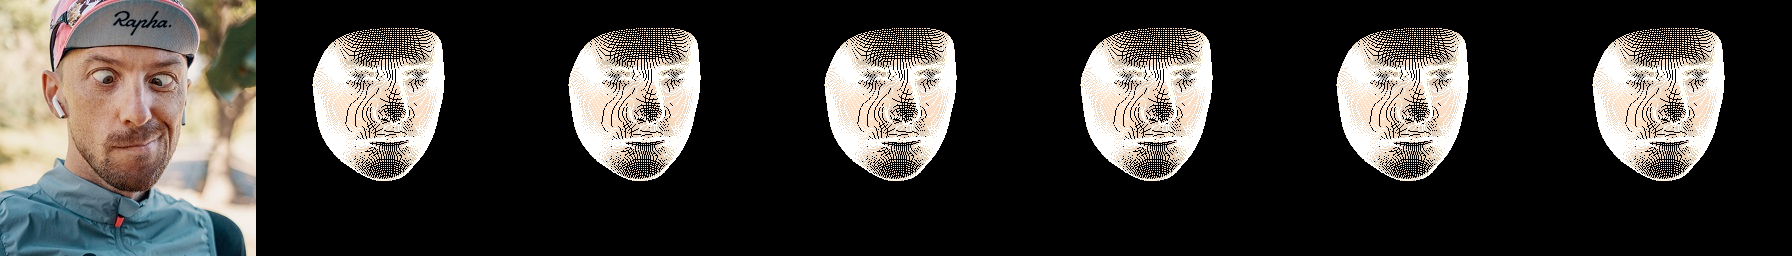

In [5]:
#display results
from IPython.display import Image, display
from IPython.display import Image

display(Image(outputDir + '/render_0.png'))
